<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU8Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports:**

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [ ]:
!pip install pymc-bart
!pip install preliz

  Using cached preliz-0.16.0-py3-none-any.whl.metadata (6.1 kB)
Using cached preliz-0.16.0-py3-none-any.whl (519 kB)


# **Project 8: What causes PM2.5 concentrations in Guanyuan?**

**Context:**

Particulate Matter. If you've ever seen the abbrevation 'PM2.5', you may be wondering what that is. So- What is Particulate Matter (PM) 2.5?
PM 2.5 refers to fine particles of air pollution with a diameter of 2.5 micrometers or less. These particles are so small that they can penetrate deep into the lungs and bloodstream. With accordance to PM2.5, thers's exposure to PM2.5 where it could reach deadly effects. So in this project, I want to explore what causes the abundance of particulate matter in Guanyuan Station.

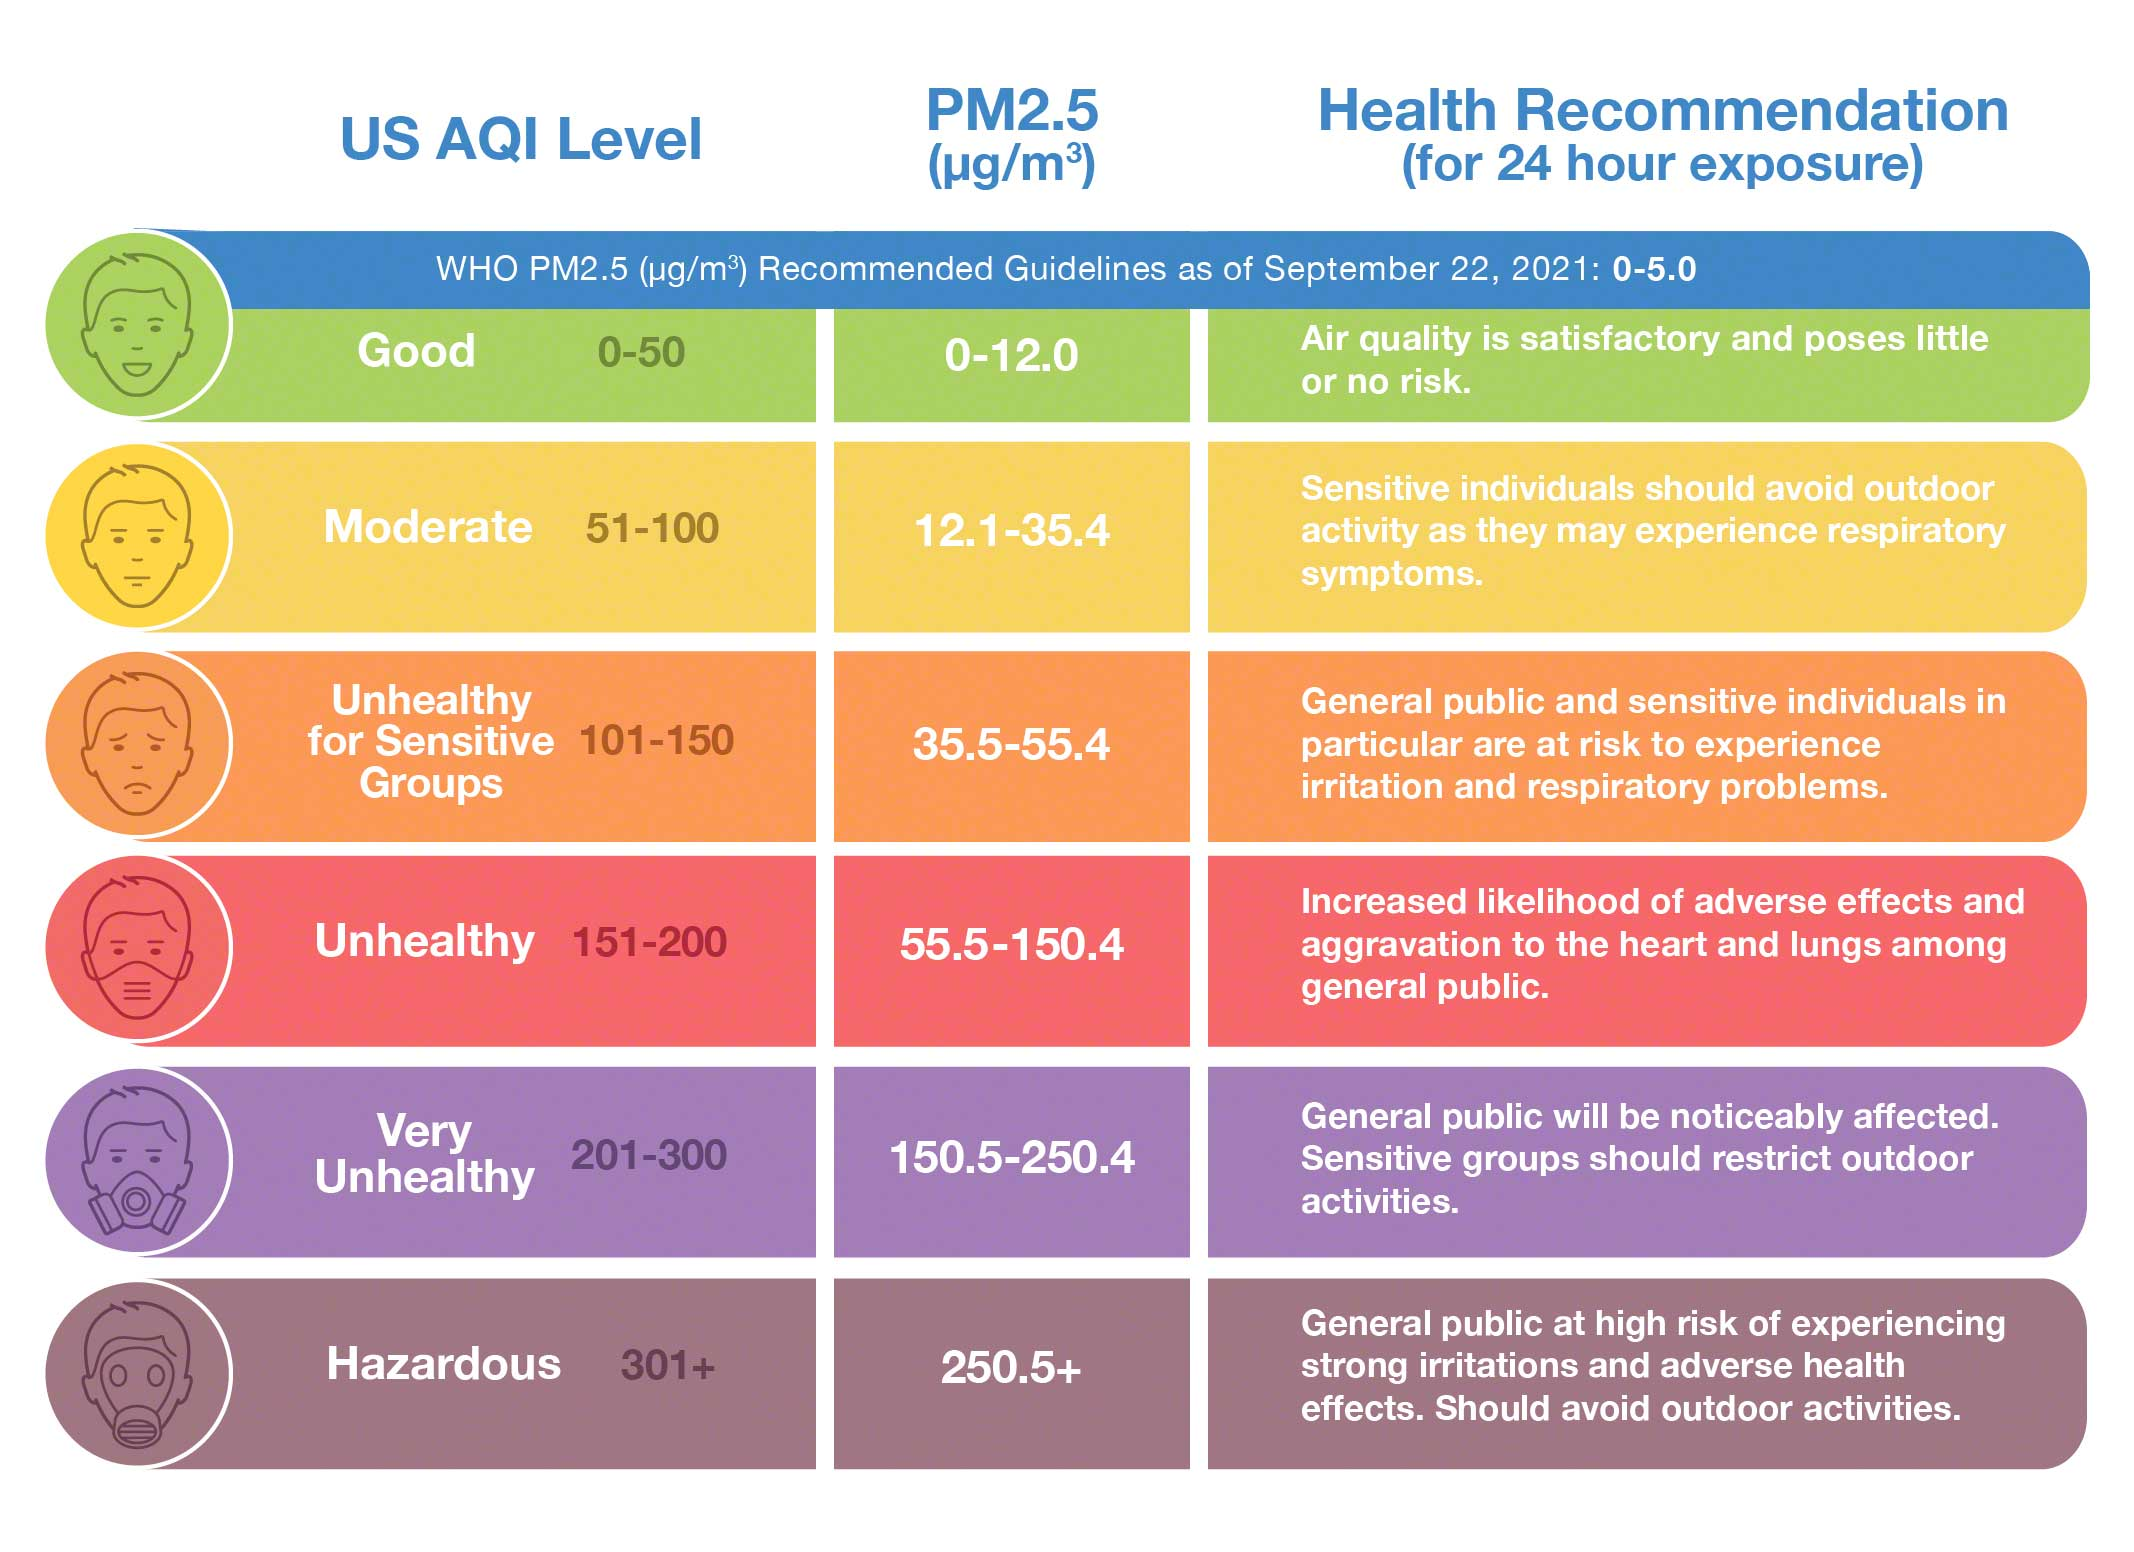

Just for reference and since I thought it would be cool to add, here's a chart for the amount of PM2.5 to be dangerous for humans. I know this says the "US AQI Level" and we're exploring a dataset in Beijing, but it should generally be the same. 👍👍

**About the dataset:**

In the beginning, I found a huge dataset over beijing's air quality. I found that the dataset contained a variety of datasets on specific stations, including the one I'm using, Guanyuan. Why Guanyuan? I didn't really know which would I should choose, so to make it randomized, I used a number generator from 1 to 12, each corresponding to each station. The number generator landed on the number corresponding to Guanyuan, so I went for it. Anyways, more on the dataset. The variables are all abreviated so it's hard to understand what they mean. Thankfully there's a chart on the website I used to identify the variables! Here it is:

- No: row number
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- PM2.5: PM2.5 concentration (ug/m^3)
- PM10: PM10 concentration (ug/m^3)
- SO2: SO2 concentration (ug/m^3)
- NO2: NO2 concentration (ug/m^3)
- CO: CO concentration (ug/m^3)
- O3: O3 concentration (ug/m^3)
- TEMP: temperature (degree Celsius)
- PRES: pressure (hPa)
- DEWP: dew point temperature (degree Celsius)
- RAIN: precipitation (mm)
- wd: wind direction
- WSPM: wind speed (m/s)
- station: name of the air-quality monitoring site

I know that was a lot, but I'll be starting now. If you want the link to the dataset, here it is as well: https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data

In [ ]:
beijing_air = pd.read_csv("https://raw.githubusercontent.com/LiterallyRicky/DataScience-A2/refs/heads/main/Data/PRSA_Data_Guanyuan_20130301-20170228.csv")
beijing_air

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [ ]:
print(beijing_air.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


Alright, so there's a lot of missing values, but also, there's tonsssss of data. With this amount of data, my models would take 20+ minutes to run. I'll be excluding some of this data, just for the modeling process to be smoother. 365 x 24 = 8760.

In [ ]:
beijing_air2 = beijing_air.dropna()[0:8760]
beijing_air2

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,10554,2014,5,14,17,6.0,27.0,4.0,26.0,400.0,91.0,23.2,997.6,3.7,0.0,SSW,1.0,Guanyuan
10554,10555,2014,5,14,18,11.0,28.0,5.0,39.0,500.0,80.0,19.9,997.6,-0.2,0.0,SSE,1.2,Guanyuan
10555,10556,2014,5,14,19,9.0,44.0,5.0,51.0,500.0,71.0,17.0,998.2,3.3,0.0,WSW,0.5,Guanyuan
10556,10557,2014,5,14,20,17.0,66.0,3.0,60.0,500.0,58.0,13.8,998.2,2.7,0.0,SW,1.1,Guanyuan


Nice! Let's begin modeling.

# **Modeling:**

Okay so here's my thought process for predictors. I'm thinking that
- temperature (TEMP),
- pressure (PRES),
- Dew Point Pressure (DEWP),
- Wind Speed (WSPM),
- Month, and
- Hour

all affect the abundance of PM2.5 concentration levels. Arguable? Definitely, but that's what I think will affect PM2.5! Let's see how it goes.

**Model 1:**


---



In [ ]:
X = beijing_air2[['TEMP', 'PRES', 'DEWP']] # testing for now
Y = beijing_air2['PM2.5']

In [ ]:
with pm.Model() as model_beijing:
    s = pm.HalfNormal('s',20) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y) #likelihood
    idata_beijing = pm.sample(compute_convergence_checks=False)

Output()

In [ ]:
pm.sample_posterior_predictive(idata_beijing,model_beijing, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

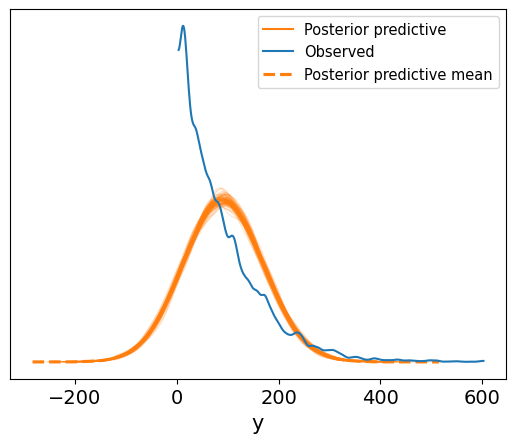

In [ ]:
ax = az.plot_ppc(idata_beijing, num_pp_samples=100, colors=["C1", "C0", "C1"])

Well, not good. Just based off the posterior predictive check, I might've done something wrong, which I think should be an easy fix. My likelihood for the model was a normal likelihood. Based off of this first model, I know that the likelihood is likely a negative binomial. Let's try it.

**Model 2 / Improved model (with the same 3 predictors):**

---



So realizing that the model has the wrong likelihood, let's make a new model with the correct likelihood - 'negativebinomial'.

In [ ]:
with pm.Model() as model_beijing2:
    s = pm.HalfNormal('s',20) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.NegativeBinomial("y", mu=μ, alpha=s,  observed=Y) #changed likelihood
    idata_beijing2 = pm.sample(compute_convergence_checks=False)

Output()

In [ ]:
pm.sample_posterior_predictive(idata_beijing2,model_beijing2, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

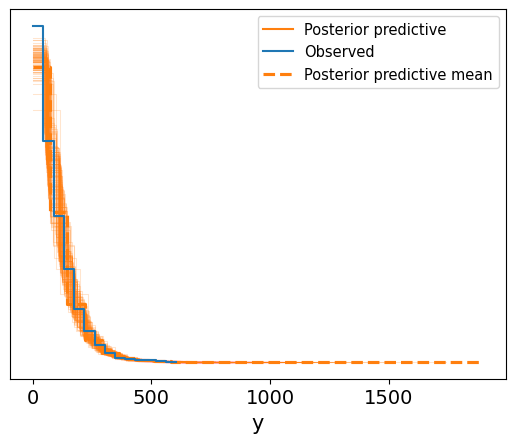

In [ ]:
ax = az.plot_ppc(idata_beijing2, num_pp_samples=100, colors=["C1", "C0", "C1"])

Great! Now this really fits reality well. Let's check the Partial Dependence Plots (pdp) and the other plots as well.

array([<Axes: xlabel='TEMP'>, <Axes: xlabel='PRES'>,
       <Axes: xlabel='DEWP'>], dtype=object)

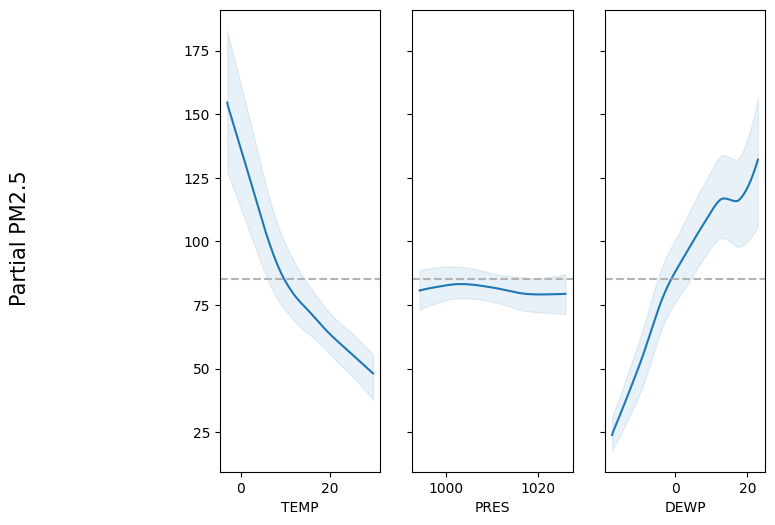

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='TEMP'>, <Axes: xlabel='PRES'>,
       <Axes: xlabel='DEWP'>], dtype=object)

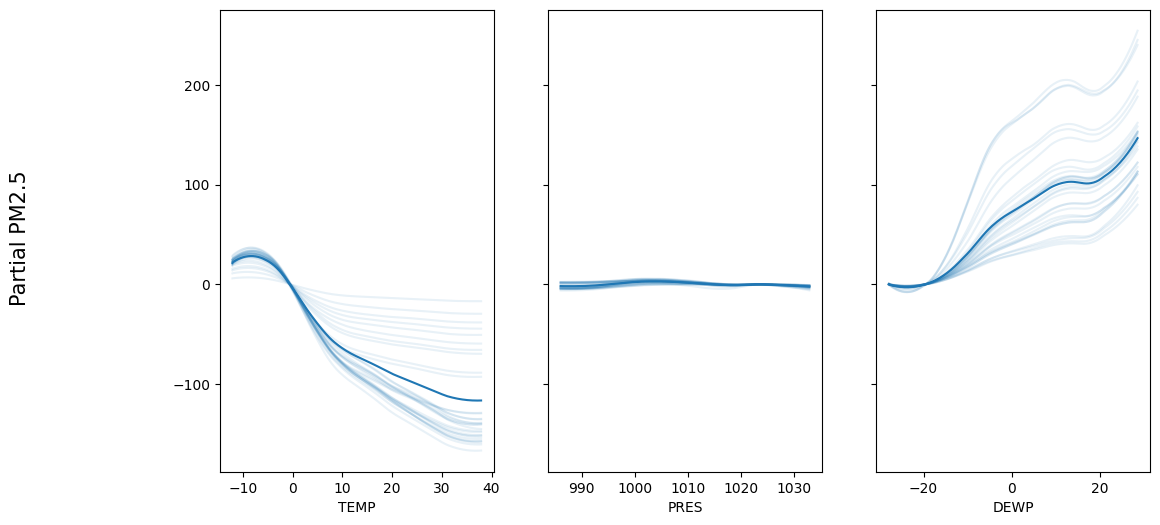

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 3), func=np.exp, figsize = (12,6))

In [ ]:
vi_beijing2 = pmb.compute_variable_importance(idata_beijing2, μ_, X)

<Axes: ylabel='R²'>

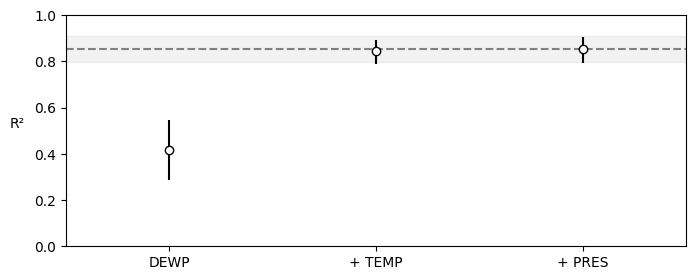

In [ ]:
pmb.plot_variable_importance(vi_beijing2)

Alright so...seeing that DEWP isn't really parallel or smooth and the low R^2 score compared to the other variables used, I'll drop DEWP for the next model. Although, I'm curious now. Which variables are the best for the model? I'll be testing the rest of the other variables to make a great final model.

**Model 3 (Changing Likelihood + Including more predictors):**

---



In [ ]:
X2 = beijing_air2[['TEMP', 'PRES', 'WSPM', 'month', 'hour']] #including the rest of the variables in DAG diagram
Y2 = beijing_air2['PM2.5']

In [ ]:
with pm.Model() as model_beijingall:
    a = pm.HalfNormal('a',20) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X2, np.log(Y2), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.NegativeBinomial("y", mu=μ, alpha=a,  observed=Y2) #likelihood
    idata_beijingall = pm.sample(compute_convergence_checks=False)

Output()

In [ ]:
pm.sample_posterior_predictive(idata_beijingall, model_beijingall, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

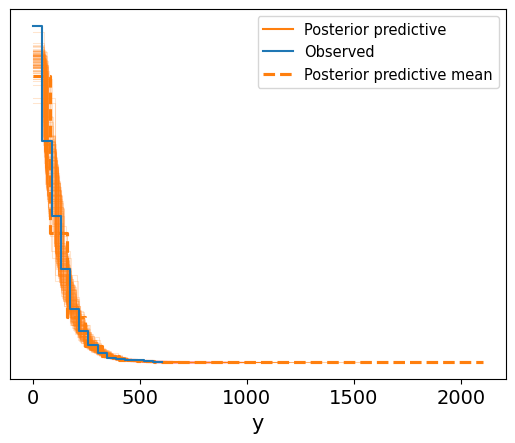

In [ ]:
ax = az.plot_ppc(idata_beijingall, num_pp_samples=100, colors=["C1", "C0", "C1"])

array([<Axes: xlabel='TEMP'>, <Axes: xlabel='PRES'>,
       <Axes: xlabel='WSPM'>, <Axes: xlabel='month'>,
       <Axes: xlabel='hour'>], dtype=object)

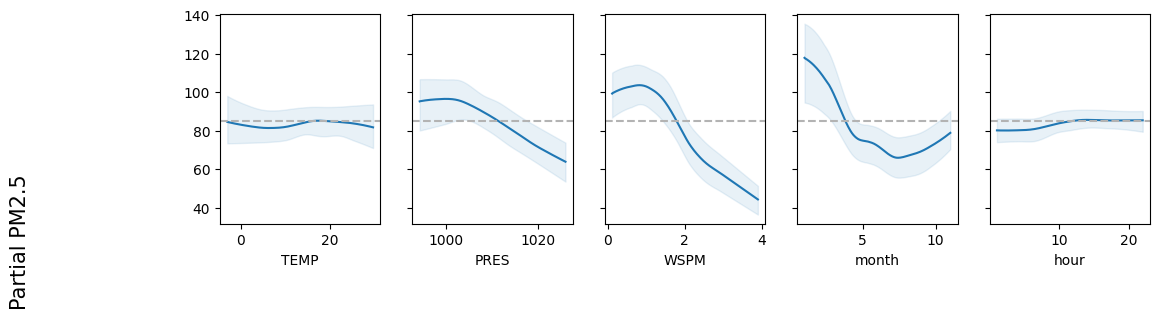

In [ ]:
pmb.plot_pdp(μ_, X2, Y2, grid=(2, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='TEMP'>, <Axes: xlabel='PRES'>,
       <Axes: xlabel='WSPM'>, <Axes: xlabel='month'>,
       <Axes: xlabel='hour'>], dtype=object)

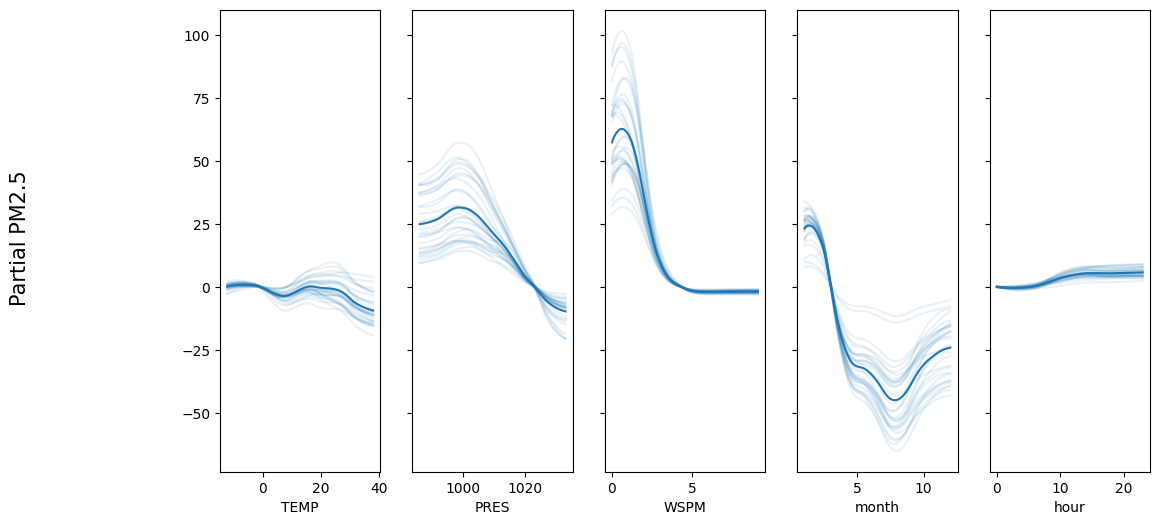

In [ ]:
pmb.plot_ice( μ_, X2, Y2, grid=(1, 5), func=np.exp, figsize = (12,6))

In [ ]:
vi_beijing2 = pmb.compute_variable_importance(idata_beijingall, μ_, X2)

<Axes: ylabel='R²'>

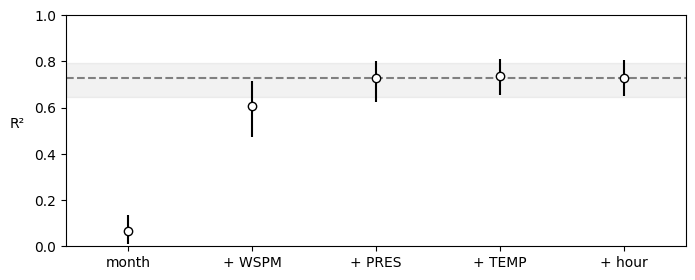

In [ ]:
pmb.plot_variable_importance(vi_beijing2)

In reality, month and WSPM is really bad according to it's unparalleledness and it's low r^2. With this, I can make my final model with the 3 variables - PRES, TEMP, and hour, all great for predicting PM2.5. (Atleast in Beijing)

**Model 4 (Including 'Best Predictors'):**

---



In [ ]:
X3 = beijing_air2[['TEMP', 'hour', 'PRES']]
Y3 = beijing_air2['PM2.5']

In [ ]:
with pm.Model() as model_beijingbest:
    a = pm.HalfNormal('a',20) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X2, np.log(Y2), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.NegativeBinomial("y", mu=μ, alpha=a,  observed=Y2) #likelihood
    idata_beijingbest = pm.sample(compute_convergence_checks=False)

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.97        1            8.71 draws/s     0:03:49   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.05        1            4.34 draws/s     0:07:40   0:00:00

In [ ]:
pm.sample_posterior_predictive(idata_beijingbest,model_beijingbest, extend_inferencedata=True)

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:02

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

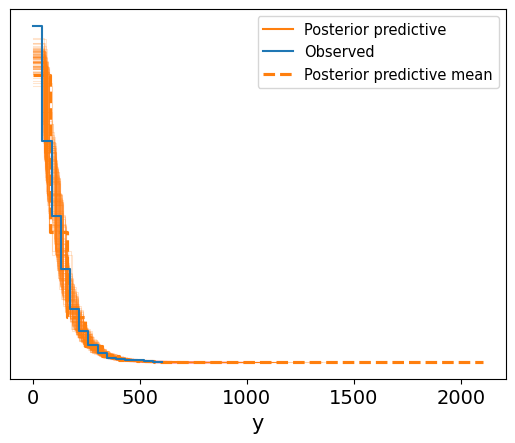

In [ ]:
ax = az.plot_ppc(idata_beijingbest, num_pp_samples=100, colors=["C1", "C0", "C1"])

For some reason, I'm not able to plot the variables due to some type of index error. However, based on the previous ice plots, variable importance plot, and current PPC, I can say that this will be the best model I can make! I'm pleased with this discovery of finding out that these variables worked the best and thankfully, Guanyuan station doesn't have AQI levels of around 300 or more.